In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [ ]:
train_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/without_test_50Agree_binary.txt'
test_file = 'drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/test_set_binary.txt'
delimiter = ','

In [ ]:
df = pd.read_csv(train_file)

In [ ]:
df

,Sentiment,News
0,positive,new production plant company would increase ca...
1,positive,according company updated strategy year 200920...
2,positive,financing aspocomp growth aspocomp aggressivel...
3,positive,last quarter 2010 componenta net sale doubled ...
4,positive,third quarter 2010 net sale increased 52 eur 2...
...,...,...
1380,negative,company said comparable operating profit janua...
1381,negative,helsinki thomson financial share cargotec fell...
1382,negative,london marketwatch share price ended lower lon...
1383,negative,operating profit fell eur 354 mn eur 688 mn 20...


In [ ]:
df1 = pd.read_csv(test_file)

In [ ]:
df1

,Sentiment,News
0,positive,recovery evident liquid handling business part...
1,positive,aim increase sale least one fifth 2006
2,positive,ixonos estimate hire 20 specialist mechanical ...
3,positive,subdivision made sale revenue last year eur 48...
4,negative,result company temporarily layoff 25 whole per...
...,...,...
577,positive,net cash flow operation expected remain positive
578,positive,bilfinger investor cheered agreement pushing s...
579,positive,contract cover hdo platform ac800 cxe880 optic...
580,positive,aim annual improvement ruukki construction ope...


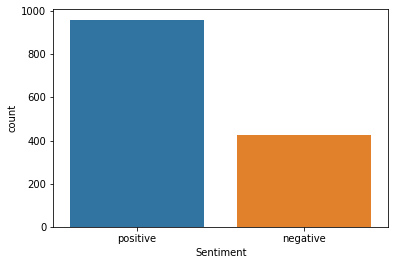

In [ ]:
import seaborn as sns

sns.countplot(x='Sentiment', data=df)

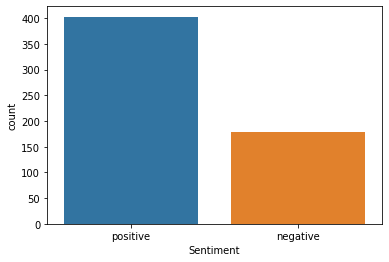

In [ ]:
import seaborn as sns

sns.countplot(x='Sentiment', data=df1)

In [ ]:
import csv
X_train = list()
y_train = list()
with open(train_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        X_train.append(row[1])
        y_train.append(row[0])

X_test = list()
y_test = list()
with open(test_file, encoding='utf-8', newline='') as infile:
    next(infile)
    reader = csv.reader(infile, delimiter=delimiter)
    for row in reader:
        X_test.append(row[1])
        y_test.append(row[0])

In [ ]:
X_train[2]

'financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit board pcbs'

In [ ]:
X = []
sentences = list(X_train)
for sen in sentences:
    X.append(X_train)

In [ ]:
X[1]

['new production plant company would increase capacity meet expected increase demand would improve use raw material therefore increase production profitability',
 'according company updated strategy year 20092012 basware target longterm net sale growth range 20 40 operating profit margin 10 20 net sale',
 'financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit board pcbs',
 'last quarter 2010 componenta net sale doubled eur131m eur76m period year earlier moved zero pretax profit pretax loss eur7m',
 'third quarter 2010 net sale increased 52 eur 2055 mn operating profit 349 eur 235 mn',
 'operating profit rose eur 131 mn eur 87 mn corresponding period 2007 representing 77 net sale',
 'operating profit totalled eur 211 mn eur 186 mn 2007 representing 97 net sale',
 'purchase agreement 7200 ton gasoline delivery hamina terminal finland signed neste oil oyj average platts index september plus eight u doll

In [ ]:
X_test[0]

'recovery evident liquid handling business particularly area outside europe primarily north america asia'

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
len(X_train),len(y_train),len(X_test),len(y_test)

(1385, 1385, 582, 582)

In [ ]:
#X = []
#sentences = list(X_train)
#for sen in sentences:
#    X_train.append(preprocess_text(sen))

In [ ]:
len(X_train)

1385

In [ ]:
#X = []
#sentences = list(X_test)
#for sen in sentences:
#    X_test.append(preprocess_text(sen))

In [ ]:
len(X_test)

582

In [ ]:
y_train = np.array(list(map(lambda x: 1 if x=="positive" else 0, y_train)))

In [ ]:
y_test = np.array(list(map(lambda x: 1 if x=="positive" else 0, y_test)))

In [ ]:
X_test

['recovery evident liquid handling business particularly area outside europe primarily north america asia',
 'aim increase sale least one fifth 2006',
 'ixonos estimate hire 20 specialist mechanical engineering electronics design rd new unit jyvaeskylae end 2009',
 'subdivision made sale revenue last year eur 4807 million eur 4149 million 2008 operating profit eur 445 million eur 74 million',
 'result company temporarily layoff 25 whole personnel approximately 270 person kirkkonummi nivala factory',
 'sale volume cocacola market share decreased 22 242',
 'helsinki afx kci konecranes said franklin resource inc share voting right finnish crane company fell last week 465 pct 9 pct october 2005',
 'operating profit rose eur 135 mn eur 97 mn corresponding period 2006',
 'glaston net profit third quarter 2007 dropped 24 mln euro 35 mln 35 mln euro 51 mln corresponding period 2006',
 'stx finland oy signed preliminary agreement building environmentally friendly new generation cruise ferry vik

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train1 = tokenizer.texts_to_sequences(X_train)
X_test1 = tokenizer.texts_to_sequences(X_test)

In [ ]:
len(X_train),len(X_test1)

(1385, 582)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train1 = pad_sequences(X_train1, padding='post', maxlen=maxlen)
X_test1 = pad_sequences(X_test1, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('drive/MyDrive/Text Analytics/Dati/archive/FinancialPhraseBank/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Simple Neural Network

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          459500    
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 469,501
Trainable params: 10,001
Non-trainable params: 459,500
_________________________________________________________________
None


In [ ]:
#X_train = np.stack(X_train, axis=0)  
#y_train = np.stack(y_train, axis=0)  

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
history = model.fit(X_train1, y_train, batch_size=1024, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
2/2 [==============================] - 2s 393ms/step - loss: 0.7460 - acc: 0.3637 - val_loss: 0.8991 - val_acc: 0.0975
Epoch 2/6
2/2 [==============================] - 0s 85ms/step - loss: 0.5961 - acc: 0.7726 - val_loss: 1.1810 - val_acc: 0.0144
Epoch 3/6
2/2 [==============================] - 0s 60ms/step - loss: 0.5057 - acc: 0.8583 - val_loss: 1.4585 - val_acc: 0.0108
Epoch 4/6
2/2 [==============================] - 0s 49ms/step - loss: 0.4553 - acc: 0.8646 - val_loss: 1.7121 - val_acc: 0.0000e+00
Epoch 5/6
2/2 [==============================] - 0s 91ms/step - loss: 0.4286 - acc: 0.8664 - val_loss: 1.9276 - val_acc: 0.0000e+00
Epoch 6/6
2/2 [==============================] - 0s 84ms/step - loss: 0.4151 - acc: 0.8664 - val_loss: 2.0973 - val_acc: 0.0000e+00


In [ ]:
instance = X[54]

In [ ]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

predictions = model.predict(instance)
y_pred = (predictions > 0.5)

In [ ]:
#plt.plot(model.loss_curve_)
#plt.show()

In [ ]:
score = model.evaluate(X_test1, y_test, verbose=1)

19/19 [==============================] - 0s 4ms/step - loss: 0.7127 - acc: 0.6924


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.7127217054367065
Test Accuracy: 0.69243985414505


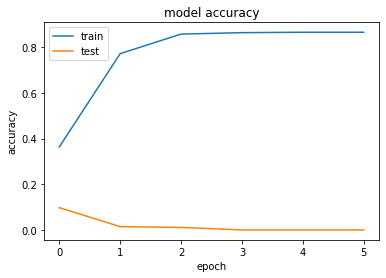

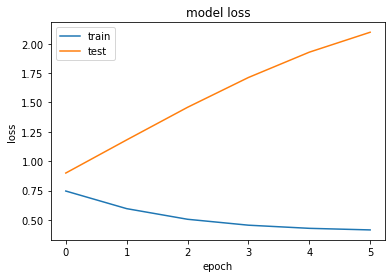

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

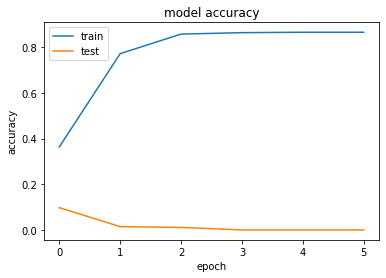

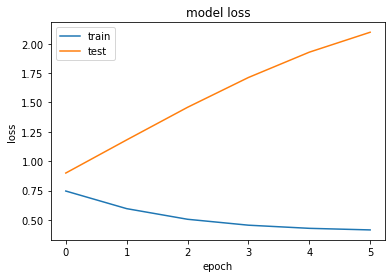

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Convolutional Neural Network

In [ ]:
from keras.layers.convolutional import Conv1D  
from keras.models import Sequential
from keras.layers import Dense 
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          459500    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 523,757
Trainable params: 64,257
Non-trainable params: 459,500
_________________________________________________________________
None


In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

#num_epochs = 12
#num_batch_size = 128

num_epochs = 72
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)

history = model.fit(X_train1, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test1, y_test), callbacks=[checkpointer], verbose=1)

score = model.evaluate(X_test1, y_test, verbose=1)

Epoch 1/5
22/22 [==============================] - 4s 111ms/step - loss: 0.5873 - acc: 0.6903 - val_loss: 0.5306 - val_acc: 0.7251
Epoch 2/5
22/22 [==============================] - 2s 107ms/step - loss: 0.4114 - acc: 0.8238 - val_loss: 0.4837 - val_acc: 0.7663
Epoch 3/5
22/22 [==============================] - 2s 94ms/step - loss: 0.3255 - acc: 0.8953 - val_loss: 0.4824 - val_acc: 0.7526
Epoch 4/5
22/22 [==============================] - 2s 90ms/step - loss: 0.2635 - acc: 0.9401 - val_loss: 0.4430 - val_acc: 0.7869
Epoch 5/5
19/19 [==============================] - 0s 11ms/step - loss: 0.4894 - acc: 0.7577


In [ ]:
yhat_probs = model.predict(X_test1, verbose=0)
# predict crisp classes for test set
yhat_classes = (model.predict(X_test1) > 0.5).astype("int32")
#yhat_classes = model.predict_classes(X_test1, verbose=0)

In [ ]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.757732
Precision: 0.747170
Recall: 0.982630
F1 score: 0.848875


In [ ]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.291506
ROC AUC: 0.864175
[[ 45 134]
 [  7 396]]


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

y_pred=model.predict(X_test1)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

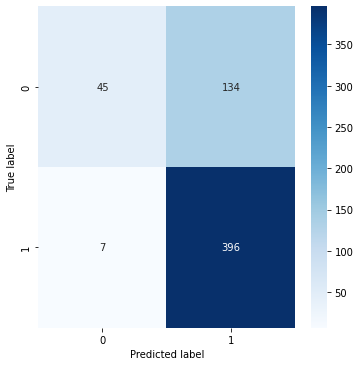

In [ ]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(matrix, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

0.8641751112466556


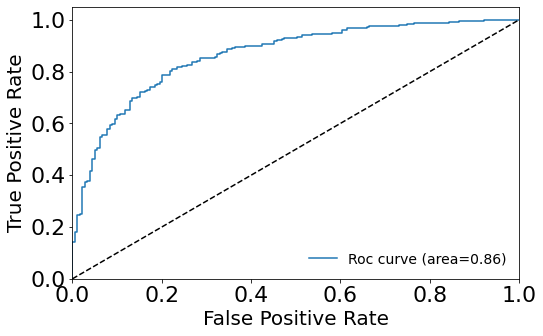

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr,tpr,_=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr,label='Roc curve (area=%0.2f)'%(roc_auc))

plt.plot([0,1],[0,1], 'k--' )
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.tick_params(axis='both',which='major',labelsize=22)
plt.legend(loc='lower right', fontsize=14, frameon=False)
plt.show()

In [ ]:
con_mat

In [ ]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
classes=[0,1]
con_mat_df = pd.DataFrame(con_mat,
                     index = classes, 
                     columns = classes)

In [ ]:
con_mat_df

In [ ]:
figure = plt.figure(figsize=(3,4))
sns.heatmap(con_mat_df, annot=True,cmap='Blues',fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Recurrent Neural Networl - LSTM

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          459500    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 576,877
Trainable params: 117,377
Non-trainable params: 459,500
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train1, y_train, batch_size=32, epochs=20, verbose=1)

score = model.evaluate(X_test1, y_test, verbose=1)

Epoch 1/20
44/44 [==============================] - 10s 152ms/step - loss: 0.6391 - acc: 0.6845
Epoch 2/20
44/44 [==============================] - 9s 204ms/step - loss: 0.6177 - acc: 0.6931
Epoch 3/20
44/44 [==============================] - 7s 160ms/step - loss: 0.6234 - acc: 0.6931
Epoch 4/20
44/44 [==============================] - 5s 125ms/step - loss: 0.6187 - acc: 0.6931
Epoch 5/20
44/44 [==============================] - 5s 103ms/step - loss: 0.6211 - acc: 0.6931
Epoch 6/20
44/44 [==============================] - 5s 103ms/step - loss: 0.6169 - acc: 0.6931
Epoch 7/20
44/44 [==============================] - 4s 100ms/step - loss: 0.6194 - acc: 0.6931
Epoch 8/20
44/44 [==============================] - 4s 99ms/step - loss: 0.6176 - acc: 0.6931
Epoch 9/20
44/44 [==============================] - 4s 102ms/step - loss: 0.6166 - acc: 0.6931
Epoch 10/20
44/44 [==============================] - 4s 102ms/step - loss: 0.6176 - acc: 0.6931
Epoch 11/20
44/44 [==============================

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6184861063957214
Test Accuracy: 0.69243985414505


KeyError: ignored

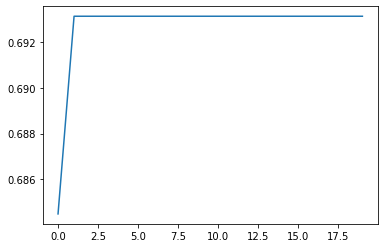

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
instance = X_test[57]
print(y_test)
print(instance)

In [ ]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

In [ ]:
embed_dim = 100
lstm_out = 196
max_fatures = 2000

model1 = Sequential()
model1.add(Embedding(vocab_size, embed_dim,input_length = maxlen))
model1.add(SpatialDropout1D(0.4))
model1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(1,activation='softmax'))
model1.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model1.summary())

In [ ]:
history = model1.fit(X_train1, y_train, epochs = 7, batch_size=32, verbose = 1, validation_split=0.2)
#history = model.fit(X_train1, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

In [ ]:
score = model1.evaluate(X_test1, y_test, verbose=2)